In [175]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

In [176]:
data = pd.read_csv('train_task_3_4.csv')
data.head()

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue
0,898,2111,280203,1,2,2
1,767,3062,55638,1,3,3
2,165,1156,386475,1,2,2
3,490,1653,997498,1,4,4
4,298,3912,578636,1,3,3


In [177]:
len(data)

1382727

            Variance  Correct Rate  Standard Error
QuestionId                                        
0           0.246891      0.443457        0.009370
1           0.263736      0.571429        0.137253
2           0.236927      0.385214        0.010121
3           0.154727      0.808757        0.007610
4           0.240421      0.401408        0.011878
...              ...           ...             ...
943         0.245667      0.566528        0.009623
944         0.123100      0.142857        0.025521
945         0.244073      0.422336        0.010220
946         0.250614      0.459459        0.047516
947         0.236664      0.617124        0.019553

[948 rows x 3 columns]


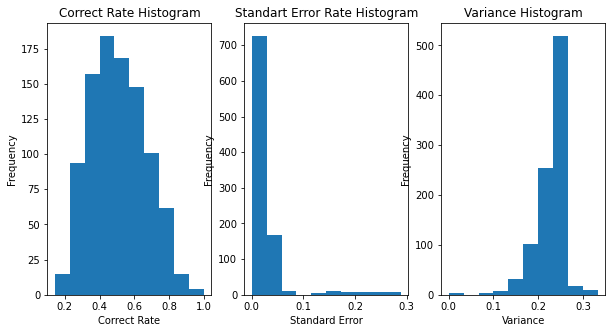

In [178]:
# calc percent of correct for each question

CorrectRatio = data.groupby('QuestionId')['IsCorrect'].mean().rename('Correct Rate')
CorrectVariance = data.groupby('QuestionId')['IsCorrect'].var().rename('Variance')
CorrectSe = data.groupby('QuestionId')['IsCorrect'].sem().rename('Standard Error')
CombinedColumn = pd.concat([CorrectVariance, CorrectRatio, CorrectSe],axis=1)

print(CombinedColumn)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))

ax1.hist(CorrectRatio)
ax1.set_title('Correct Rate Histogram')
ax1.set_xlabel('Correct Rate')
ax1.set_ylabel('Frequency')

ax2.hist(CorrectSe)
ax2.set_title('Standart Error Rate Histogram')
ax2.set_xlabel('Standard Error')
ax2.set_ylabel('Frequency')

ax3.hist(CorrectVariance)
ax3.set_title('Variance Histogram')
ax3.set_xlabel('Variance')
ax3.set_ylabel('Frequency')

plt.show()

In [198]:
x = CombinedColumn[ ['Correct Rate','Standard Error'] ]
y = CombinedColumn['Variance']
# print(x.head())
# print(y.head())
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

x_train_mixxed = pd.concat([x_train['Correct Rate'],x_train['Standard Error'],x_train['Correct Rate']*x_train['Standard Error']],axis=1)
x_train_mixxed.columns=['Correct Rate','Standard Error','Rate X Se']
print(x_train_mixxed)

line_fitter = LinearRegression()
line_fitter.fit(x_train_mixxed, rate_error)

x_predicted = pd.concat([x['Correct Rate'],x['Standard Error'],x['Correct Rate']*x['Standard Error']],axis=1)
x_predicted.columns=['Correct Rate','Standard Error','Rate X Se']
print(x_predicted)

y_predicted = line_fitter.predict(x_predicted)
y_predicted = pd.DataFrame(y_predicted)
y_predicted.columns=['Prediction']

#index => questionId
index = [i+1 for i in range(len(y_predicted))]
index = pd.DataFrame(index)
index.columns=['Index']
print(y_predicted)

            Correct Rate  Standard Error  Rate X Se
QuestionId                                         
360             0.602703        0.009617   0.005796
354             0.438492        0.015637   0.006857
404             0.448221        0.013988   0.006270
278             0.541384        0.009667   0.005233
12              0.399177        0.011878   0.004741
...                  ...             ...        ...
106             0.543561        0.010841   0.005893
270             0.457143        0.059971   0.027415
860             0.466667        0.133333   0.062222
435             0.544410        0.010471   0.005701
102             0.446927        0.037265   0.016655

[568 rows x 3 columns]
            Correct Rate  Standard Error  Rate X Se
QuestionId                                         
0               0.443457        0.009370   0.004155
1               0.571429        0.137253   0.078430
2               0.385214        0.010121   0.003899
3               0.808757        0.007610

number of evalutatino : 25


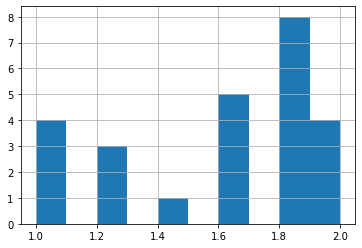

In [180]:
# load evaluators' score on "validation" set
eval_validation = pd.read_csv('quality_response_remapped_public.csv')
eval_validation = eval_validation.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)
print(f"number of evalutatino : {len(eval_validation)}")

# take the average of 5 evaulators` scores
eval_validation['score'] = eval_validation.filter(regex='^T', axis = 1).mean(axis=1)
eval_validation['score'].hist()

# decide preference
import numpy as np
def calc_preference(scores):
    global preference 
    preference = np.ones(len(scores), dtype=int)
    idx_two = scores > 1.5
    preference[idx_two] = 2
    return list(preference)

   left  right  T1_ALR  T2_CL  T3_GF  T4_MQ  T5_NS  score  preference
0   909    318       2      2      2    1.0      2    1.8           2
1   285    609       2      2      2    2.0      2    2.0           2
2   132    271       1      2      2    2.0      1    1.6           2
3   704    127       2      2      1    2.0      2    1.8           2
4    16    586       1      1      2    2.0      2    1.6           2


<AxesSubplot:>

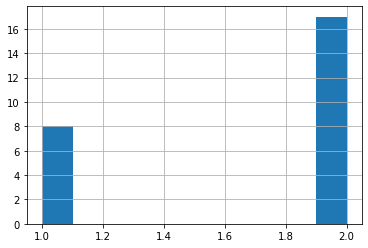

In [181]:
eval_validation['preference'] = calc_preference(eval_validation['score'])
print(eval_validation.head())
eval_validation['preference'].hist()

   left  right  T1_ALR  T2_CL  T3_GF  T4_MQ  T5_NS  score  preference
0   145    762       2      2      2    2.0      2    2.0           2
1   307    208       1      1      1    2.0      1    1.2           1
2   278    195       1      1      1    1.0      1    1.0           1
3    13    153       2      2      2    2.0      2    2.0           2
4    23    100       2      1      1    1.0      1    1.2           1


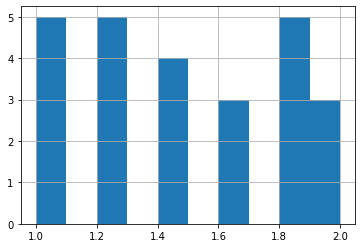

In [182]:
eval_test = pd.read_csv('quality_response_remapped_private.csv')
eval_test = eval_test.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)
# take the average of scores by 5 evaulators
eval_test['score'] = eval_test.filter(regex='^T', axis = 1).mean(axis=1)
eval_test['score'].hist()
eval_test['preference'] = calc_preference(eval_test['score'])
print(eval_test.head())

In [183]:
#change priority from evaluator's result ==> eval_validation, eval_test
for i in eval_validation.index:
    left = eval_validation['left'][i]
    right = eval_validation['right'][i]
    if(eval_validation['preference'][i]== 2.0 and y_predicted['Prediction'][left]>y_predicted['Prediction'][right]):
        temp = y_predicted['Prediction'][left]
        y_predicted['Prediction'][left] = y_predicted['Prediction'][right]
        y_predicted['Prediction'][right] = temp
    
for i in eval_test.index:
    left = eval_test['left'][i]
    right = eval_test['right'][i]
    if(eval_test['preference'][i]== 2.0 and y_predicted['Prediction'][left]>y_predicted['Prediction'][right]):
        temp = y_predicted['Prediction'][left]
        y_predicted['Prediction'][left] = y_predicted['Prediction'][right]
        y_predicted['Prediction'][right] = temp

In [270]:
solution = pd.concat([index['Index'],y_predicted['Prediction']],axis=1)
solution = solution.sort_values('Prediction',ascending=False)
solution['Index'] = solution['Index']-1

ranking = [(i+1) for i in range(len(solution))]
ranking = pd.DataFrame(ranking)
ranking.columns=['ranking']

solution = solution.reset_index(drop=True)
solution = pd.concat([solution, ranking], axis=1)

print(solution)
solution = solution.sort_values('Index',ascending=True)
print(solution)

final_solution = solution['ranking']

     Index    Prediction  ranking
0      153  1.875000e-01        1
1      608  1.875000e-01        2
2      730  1.875000e-01        3
3      294  1.443376e-01        4
4       15  1.443376e-01        5
..     ...           ...      ...
943    155  1.494050e-03      944
944    931  1.427213e-03      945
945    847 -6.320359e-18      946
946    660 -6.320359e-18      947
947    841 -6.320359e-18      948

[948 rows x 3 columns]
     Index  Prediction  ranking
834      0    0.004155      835
25       1    0.078430       26
852      2    0.003899      853
525      3    0.006154      526
769      4    0.004768      770
..     ...         ...      ...
660    943    0.005452      661
875    944    0.003646      876
814    945    0.004316      815
106    946    0.021832      107
228    947    0.012067      229

[948 rows x 3 columns]


In [278]:
template = pd.read_csv('template.csv')
template = template.drop(['ranking'],axis=1)
print(template)

final_solution = final_solution.reset_index(drop=True)
template = pd.concat([template, final_solution], axis=1)

print(template)

template.to_csv('20192425.csv')

     QuestionId
0             0
1             1
2             2
3             3
4             4
..          ...
943         943
944         944
945         945
946         946
947         947

[948 rows x 1 columns]
     QuestionId  ranking
0             0      835
1             1       26
2             2      853
3             3      526
4             4      770
..          ...      ...
943         943      661
944         944      876
945         945      815
946         946      107
947         947      229

[948 rows x 2 columns]
